In [2]:
import tensorflow as tf
from keras.src import layers
from keras.src.callbacks import EarlyStopping, ReduceLROnPlateau
import keras
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = keras.Sequential([
    layers.Input((28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (5, 5), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (5, 5), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(128, (4, 4), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

In [5]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
early_stop = EarlyStopping(monitor="val_accuracy", patience=6, restore_best_weights=True)

lr_schedule = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_images,
    train_labels,
    epochs=85,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop, lr_schedule],
)

Epoch 1/85
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9980 - loss: 0.0070 - val_accuracy: 0.9965 - val_loss: 0.0163 - learning_rate: 7.8125e-06
Epoch 2/85
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9973 - loss: 0.0078 - val_accuracy: 0.9965 - val_loss: 0.0165 - learning_rate: 7.8125e-06
Epoch 3/85
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9965 - val_loss: 0.0164 - learning_rate: 7.8125e-06
Epoch 4/85
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9980 - loss: 0.0074
Epoch 4: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9980 - loss: 0.0074 - val_accuracy: 0.9965 - val_loss: 0.0165 - learning_rate: 7.8125e-06
Epoch 5/85
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9973 - loss: 0.0087 - val_accuracy: 0.9963 - val_loss: 0.0164 - learning_rate: 3.9063e-06
Epoch 6/85
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9949 - loss: 0.0170

Test accuracy: 0.9959


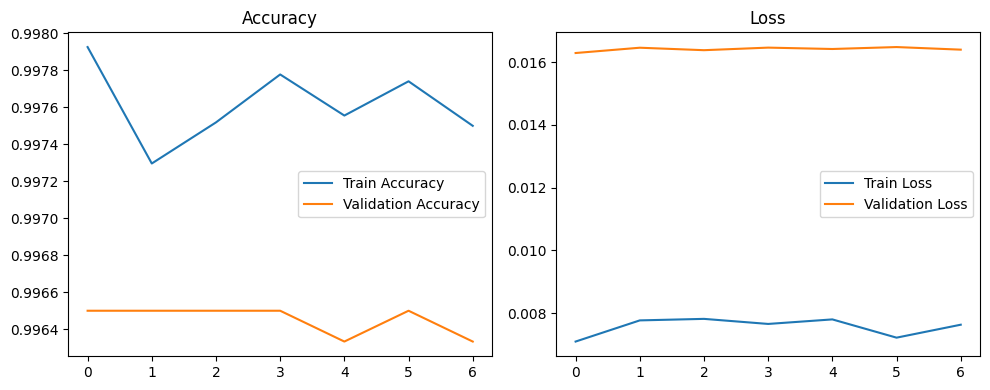

In [16]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

Performance Analysis

Validation Accuracy: 99.72%

Test Accuracy: 99.59%

Input Shape: (28, 28, 1)

Model Architecture
Total Convolutional Layers: 9, arranged in 3 increasingly deep blocks

Downsampling Method: Strided convolutions (stride=2) instead of pooling layers

Normalization: BatchNormalization applied after each convolution

Regularization: Dropout (rate = 0.4) applied after every block

Output Layer: Dense layer with 10 units and softmax activation

Training Configuration
Optimizer: RMSprop (learning_rate=0.001, rho=0.9)

Loss Function: sparse_categorical_crossentropy

Batch Size: 64

Epochs: Up to 100 (early stopping triggered at 31)

Learning Rate Scheduler: ReduceLROnPlateau (patience=3, factor=0.5)

Regularization Methods: Dropout (0.4) and BatchNormalization

Final Downsampling: GlobalAveragePooling2D

Key Takeaways

Start with a single convolutional layer followed by max pooling — effective for achieving high accuracy on MNIST.

Adding multiple convolutional layers before pooling may lead to overfitting, visible when validation loss increases.

Applying Dropout and BatchNormalization significantly helps reduce overfitting.

Experiment with various hyperparameter settings and layer combinations for optimal results.

Smaller batch sizes often lead to better generalization.

Stacking multiple 3×3 convolutional kernels enhances non-linearity and feature extraction.

Using 5×5 kernels with stride 2 is effective for simultaneous downsampling and feature learning.